In [8]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)

# Step 2: Load dataset
df = pd.read_csv("smart_deal_recommendations (1).csv")

# Step 3: Quick overview
print("Shape of dataset:", df.shape)
df.head()


Shape of dataset: (12684, 42)


,trip_purpose,travel_company,current_weather,ambient_temp,time_of_day,offer_type,deal_expiry_window,user_gender,user_age_group,relationship_status,num_dependents,education_level,job_type,salary_range,vehicle_type,visit_bar_freq,visit_cafe_freq,visit_takeout_freq,visit_restaurant_low,visit_restaurant_high,min_gap_to_offer_5,min_gap_to_offer_15,min_gap_to_offer_25,direction_match,direction_mismatch,redeemed,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Dataset information
df.info()

# Missing values count
print("\nMissing values per column:")
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trip_purpose           12684 non-null  object 
 1   travel_company         12684 non-null  object 
 2   current_weather        12684 non-null  object 
 3   ambient_temp           12684 non-null  int64  
 4   time_of_day            12684 non-null  object 
 5   offer_type             12684 non-null  object 
 6   deal_expiry_window     12684 non-null  object 
 7   user_gender            12684 non-null  object 
 8   user_age_group         12684 non-null  object 
 9   relationship_status    12684 non-null  object 
 10  num_dependents         12684 non-null  int64  
 11  education_level        12684 non-null  object 
 12  job_type               12684 non-null  object 
 13  salary_range           12684 non-null  object 
 14  vehicle_type           108 non-null    object 
 15  vi

In [10]:
# Drop completely empty columns
df = df.dropna(axis=1, how='all')

# Drop 'vehicle_type' since it's mostly missing
if 'vehicle_type' in df.columns:
    df = df.drop('vehicle_type', axis=1)

print("Shape after dropping empty columns:", df.shape)


Shape after dropping empty columns: (12684, 25)


In [11]:
# Fill missing values in lifestyle frequency columns with 'Unknown'
freq_cols = ['visit_bar_freq', 'visit_cafe_freq', 'visit_takeout_freq', 
             'visit_restaurant_low', 'visit_restaurant_high']

for col in freq_cols:
    if col in df.columns:
        df[col].fillna('Unknown', inplace=True)

# Confirm missing values handled
print("Remaining missing values:\n", df.isnull().sum().sum())


Remaining missing values:
 0


In [12]:
# Identify categorical columns
cat_cols = df.select_dtypes(include='object').columns.tolist()
print("Categorical columns:\n", cat_cols)

# One-Hot Encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

print("\nShape after encoding:", df_encoded.shape)
df_encoded.head()


Categorical columns:
 ['trip_purpose', 'travel_company', 'current_weather', 'time_of_day', 'offer_type', 'deal_expiry_window', 'user_gender', 'user_age_group', 'relationship_status', 'education_level', 'job_type', 'salary_range', 'visit_bar_freq', 'visit_cafe_freq', 'visit_takeout_freq', 'visit_restaurant_low', 'visit_restaurant_high']

Shape after encoding: (12684, 98)


,ambient_temp,num_dependents,min_gap_to_offer_5,min_gap_to_offer_15,min_gap_to_offer_25,direction_match,direction_mismatch,redeemed,trip_purpose_No Urgent Place,trip_purpose_Work,travel_company_Friend(s),travel_company_Kid(s),travel_company_Partner,current_weather_Snowy,current_weather_Sunny,time_of_day_10PM,time_of_day_2PM,time_of_day_6PM,time_of_day_7AM,offer_type_Carry out & Take away,offer_type_Coffee House,offer_type_Restaurant(20-50),offer_type_Restaurant(<20),deal_expiry_window_2h,user_gender_Male,user_age_group_26,user_age_group_31,user_age_group_36,user_age_group_41,user_age_group_46,user_age_group_50plus,user_age_group_below21,relationship_status_Married partner,relationship_status_Single,relationship_status_Unmarried partner,relationship_status_Widowed,education_level_Bachelors degree,education_level_Graduate degree (Masters or Doctorate),education_level_High School Graduate,education_level_Some High School,education_level_Some college - no degree,job_type_Arts Design Entertainment Sports & Media,job_type_Building & Grounds Cleaning & Maintenance,job_type_Business & Financial,job_type_Community & Social Services,job_type_Computer & Mathematical,job_type_Construction & Extraction,job_type_Education&Training&Library,job_type_Farming Fishing & Forestry,job_type_Food Preparation & Serving Related,job_type_Healthcare Practitioners & Technical,job_type_Healthcare Support,job_type_Installation Maintenance & Repair,job_type_Legal,job_type_Life Physical Social Science,job_type_Management,job_type_Office & Administrative Support,job_type_Personal Care & Service,job_type_Production Occupations,job_type_Protective Service,job_type_Retired,job_type_Sales & Related,job_type_Student,job_type_Transportation & Material Moving,job_type_Unemployed,salary_range_$12500 - $24999,salary_range_$25000 - $37499,salary_range_$37500 - $49999,salary_range_$50000 - $62499,salary_range_$62500 - $74999,salary_range_$75000 - $87499,salary_range_$87500 - $99999,salary_range_Less than $12500,visit_bar_freq_4~8,visit_bar_freq_Unknown,visit_bar_freq_gt8,visit_bar_freq_less1,visit_bar_freq_never,visit_cafe_freq_4~8,visit_cafe_freq_Unknown,visit_cafe_freq_gt8,visit_cafe_freq_less1,visit_cafe_freq_never,visit_takeout_freq_4~8,visit_takeout_freq_Unknown,visit_takeout_freq_gt8,visit_takeout_freq_less1,visit_takeout_freq_never,visit_restaurant_low_4~8,visit_restaurant_low_Unknown,visit_restaurant_low_gt8,visit_restaurant_low_less1,visit_restaurant_low_never,visit_restaurant_high_4~8,visit_restaurant_high_Unknown,visit_restaurant_high_gt8,visit_restaurant_high_less1,visit_restaurant_high_never
0,55,1,1,0,0,0,1,1,True,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False
1,80,1,1,0,0,0,1,0,True,False,True,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False
2,80,1,1,1,0,0,1,1,True,False,True,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df_encoded.drop('redeemed', axis=1)
y = df_encoded['redeemed']

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training set shape:", X_train_scaled.shape)
print("Testing set shape:", X_test_scaled.shape)


Training set shape: (10147, 97)
Testing set shape: (2537, 97)


🔹 Logistic Regression Performance 🔹
Accuracy: 0.683
ROC-AUC Score: 0.733

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.56      0.60      1095
           1       0.70      0.78      0.74      1442

    accuracy                           0.68      2537
   macro avg       0.68      0.67      0.67      2537
weighted avg       0.68      0.68      0.68      2537



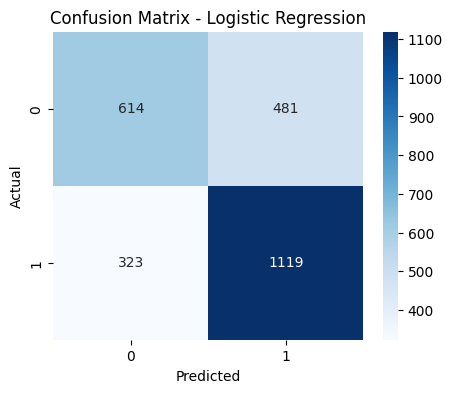

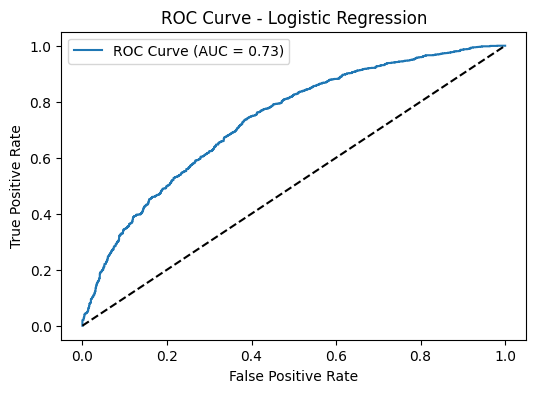

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize and train model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Predictions
y_pred = log_reg.predict(X_test_scaled)
y_prob = log_reg.predict_proba(X_test_scaled)[:, 1]

# Evaluation
print("🔹 Logistic Regression Performance 🔹")
print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print("ROC-AUC Score:", round(roc_auc_score(y_test, y_prob), 3))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc_score(y_test, y_prob):.2f})")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()


🌳 Random Forest Performance 🌳
Accuracy: 0.744
ROC-AUC Score: 0.812

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.63      0.68      1095
           1       0.75      0.83      0.79      1442

    accuracy                           0.74      2537
   macro avg       0.74      0.73      0.73      2537
weighted avg       0.74      0.74      0.74      2537



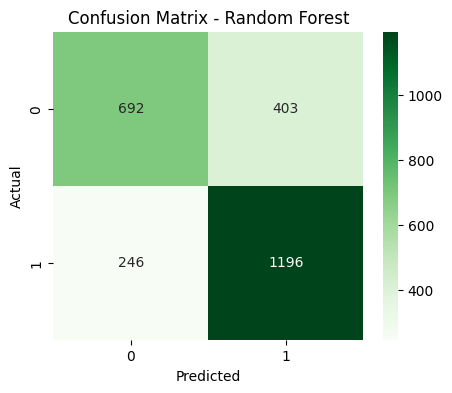

In [15]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test_scaled)
y_prob_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

# Evaluation
print("🌳 Random Forest Performance 🌳")
print("Accuracy:", round(accuracy_score(y_test, y_pred_rf), 3))
print("ROC-AUC Score:", round(roc_auc_score(y_test, y_prob_rf), 3))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


⚡ XGBoost Performance ⚡
Accuracy: 0.747
ROC-AUC Score: 0.82

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.65      0.69      1095
           1       0.75      0.82      0.79      1442

    accuracy                           0.75      2537
   macro avg       0.75      0.74      0.74      2537
weighted avg       0.75      0.75      0.74      2537



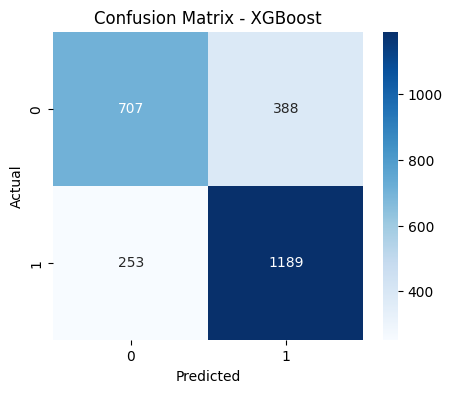

In [16]:
from xgboost import XGBClassifier

# Train XGBoost
xgb_model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='logloss'
)

xgb_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test_scaled)
y_prob_xgb = xgb_model.predict_proba(X_test_scaled)[:, 1]

# Evaluation
print("⚡ XGBoost Performance ⚡")
print("Accuracy:", round(accuracy_score(y_test, y_pred_xgb), 3))
print("ROC-AUC Score:", round(roc_auc_score(y_test, y_prob_xgb), 3))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))

# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


<Figure size 1000x600 with 0 Axes>

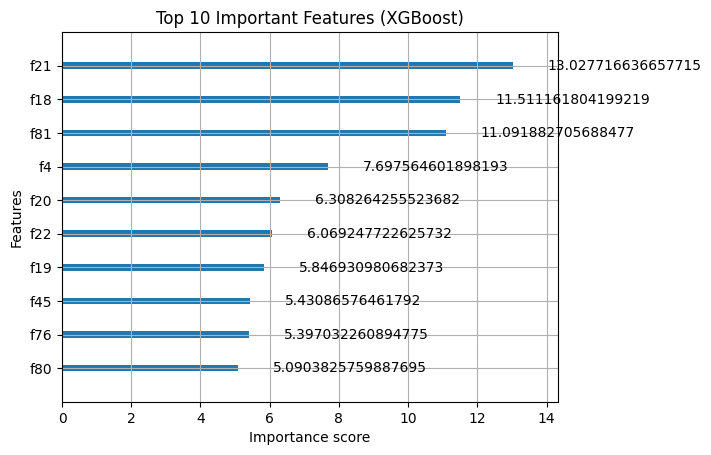

In [17]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

plt.figure(figsize=(10, 6))
plot_importance(xgb_model, max_num_features=10, importance_type='gain')
plt.title("Top 10 Important Features (XGBoost)")
plt.show()


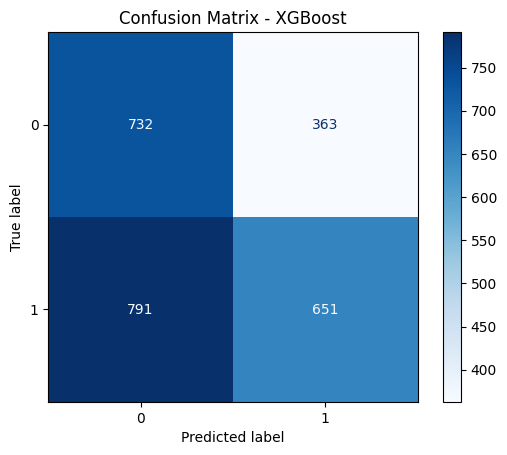

In [18]:
# Generate predictions from the trained XGBoost model
xgb_pred = xgb_model.predict(X_test)

# Now display confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, xgb_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - XGBoost")
plt.show()



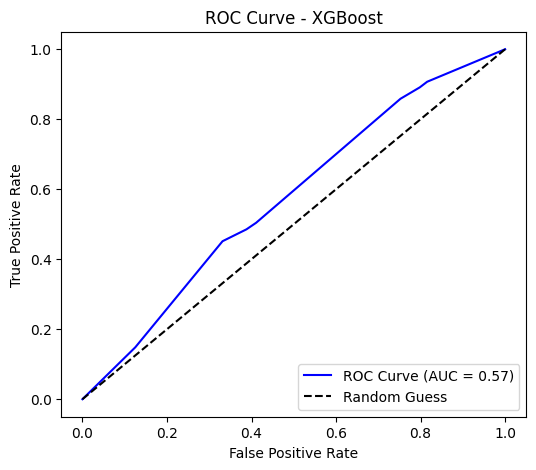

In [19]:
from sklearn.metrics import roc_curve, auc

y_probs = xgb_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost")
plt.legend(loc="lower right")
plt.show()


In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy:", accuracy_score(y_test, xgb_pred))
print("Precision:", precision_score(y_test, xgb_pred))
print("Recall:", recall_score(y_test, xgb_pred))
print("F1 Score:", f1_score(y_test, xgb_pred))


Accuracy: 0.5451320457232952
Precision: 0.6420118343195266
Recall: 0.45145631067961167
F1 Score: 0.5301302931596091


In [21]:
xgb_pred = xgb_model.predict(X_test)
xgb_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, xgb_pred))
print(classification_report(y_test, xgb_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, xgb_pred))


Accuracy: 0.5451320457232952
              precision    recall  f1-score   support

           0       0.48      0.67      0.56      1095
           1       0.64      0.45      0.53      1442

    accuracy                           0.55      2537
   macro avg       0.56      0.56      0.54      2537
weighted avg       0.57      0.55      0.54      2537

Confusion Matrix:
 [[732 363]
 [791 651]]


In [22]:
new_user = {
    'trip_purpose': 'Work',
    'travel_company': 'Alone',
    'current_weather': 'Sunny',
    'ambient_temp': 25,
    'time_of_day': 'Morning',
    'offer_type': 'Restaurant',
    'deal_expiry_window': '1 Day',
    'user_gender': 'Male',
    'user_age_group': '26-35',
    'relationship_status': 'Single',
    'num_dependents': 0,
    'education_level': 'Bachelors',
    'job_type': 'Private Sector',
    'salary_range': '25K-50K',
    'visit_bar_freq': 'Never',
    'visit_cafe_freq': 'Rarely',
    'visit_takeout_freq': 'Often',
    'visit_restaurant_low': 'Sometimes',
    'visit_restaurant_high': 'Rarely',
    'min_gap_to_offer_5': 3,
    'min_gap_to_offer_15': 5,
    'min_gap_to_offer_25': 10,
    'direction_match': 1,
    'direction_mismatch': 0
}

predict_coupon_redeem(new_user, xgb_model, X_train)


🎯 Predicted Class: Redeem ✅
🔮 Redemption Probability: 0.53


(1, 0.52527016)